<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">e05d</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Langages et programmation</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">La récursivité</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Coloriage</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
- Mise en oeuvre d'un algorithme de coloriage récursif ?

<div class = "alert alert-info">
    
**Sommaire :**

- <a href=#intro>Introduction</a>  
- <a href=#principe>Principe</a>  
- <a href=#1D>On commence en 1D</a>  
- <a href=#images>Ouvrir, lire et modifier une image</a>  
- <a href=#2D>On passe à la 2D</a>  


</div>

<div id="intro"></div>

## Introduction
![Un_p_tit_coloriage](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/licorne_1.png?raw=true)
Allez, n'ayez pas honte... avouez qu'il y a quelque chose de satisfaisantt dans cette activité ;)

Nous allons mettre en oeuvre l'algorithme qui permet de colorier de la même couleur des points inclus dans une même zone délimitée par un trait.

L'algorithme derrière l'outil "Pot de peinture" est aussi le même qui permet de découvrir les zones sans mines au jeu du Démineur, ou, plus étonnant, celui qui permet de trouver la sortie d'un labyrinthe.

Une version assez "élégante" de cet algorithme utilise la récursivité; mais il trouve rapidement ses limites dans le cas de "grandes" quantités de données à traiter, ce qui fait que dans la pratique les usages ci-dessus sont codées d'une autre manière ( que nous aborderons plus tard lors du chapitre sur les parcours de graphes ).

<div id="principe"></div>

## Principe

Le point choisi à l'intérieur de la zone à colorier s'appelle le "germe" ou la "graine". A partir de lui, on appelle la fonction de remplissage :

- on colorie le point avec la nouvelle couleur
- on examine son voisin de droite : si il est toujours de la couleur d'origine, alors on propage la récursion à ce point
- on fait pareil avec le voisin de gauche, celui du haut, et du bas ( et éventuellement, dans une version plus évoluée, le voisin en haut à gauche, en haut à droite, etc...)

Et c'est tout ! Facile, non ? ( en fait, il manque quelques "sécurités" à cet algorithme, notamment vérifier que l'on ne sort pas de la zone de dessin...)

Mais attendez voir...je vois bien les appels récursifs, mais où est le cas de base ?

Il est en fait combiné avec le cas général dans l'évaluation des conditions : si le point n'est pas de la couleur d'origine, alors c'est qu'il est de la couleur d'une ligne frontière : la récursion s'arrête alors.

![Propagation_recursivité](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/animation_propagation_rec.gif?raw=true)

<div id="1D"></div>

## On commence en 1D

Soit une liste de pixels bien gentiment alignés.  
Arbitrairement, nous choisissons de désigner par '0' les pixels blancs 'à colorier'  
Par '1' les pixels noirs (les délimitations)  
Par '2' les pixels coloriés.  



In [12]:
liste_pixels = [1, 0, 0 , 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


![Propagation_recursivité](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/1D_1.png?raw=true)
La 'graine' se situe au dixième pixel (indice 9 de notre liste)  
A la fin de notre traitement, tous les pixels blans contigues à la graine seont coloriés.


![Propagation_recursivité](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/1D_2.png?raw=true)

#### Premier programme de coloriage
Ci dessous la fonction <code>rempli_1D()</code> prend en paramètre la liste à colorier et l'indice (l'abscisse) du point à colorier (et d'où il faut continuer à propager le coloriage)


In [20]:
def rempli_1D(ma_liste, abscisse):
    if ma_liste[abscisse] == 0: # Si le point est blanc
        ma_liste[abscisse] = 2 # Je change la couleur
        rempli_1D(ma_liste, abscisse - 1) # On poursuit l'exploration par la gauche
        rempli_1D(ma_liste, abscisse + 1) # On poursuit l'exploration par la droite
        
liste_pixels = [1, 0, 0 , 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
rempli_1D(liste_pixels, 9) # On lance le remplissage depuis la graine
liste_pixels

[1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

En ajoutant quelques 'print' nous pouvons faire apparaître l'ordre des appels récursifs.  
Nous pouvons même dessiner l'arbre de ces appels.

In [24]:
def rempli_1D(ma_liste, abscisse):
    if ma_liste[abscisse] == 0: # Si le point est blanc
        ma_liste[abscisse] = 2 # Je change la couleur
        print(abscisse, "->", abscisse-1, end="  ")
        rempli_1D(ma_liste, abscisse - 1) # On poursuit l'exploration par la gauche
        print(abscisse, "->", abscisse+1, end="  ")
        rempli_1D(ma_liste, abscisse + 1) # On poursuit l'exploration par la droite
    else:
        print(abscisse,"X")
        
liste_pixels = [1, 0, 0 , 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
rempli_1D(liste_pixels, 9) # On lance le remplissage depuis la graine
liste_pixels

9 -> 8  8 -> 7  7 -> 6  6 -> 5  5 -> 4  4 X
5 -> 6  6 X
6 -> 7  7 X
7 -> 8  8 X
8 -> 9  9 X
9 -> 10  10 -> 9  9 X
10 -> 11  11 -> 10  10 X
11 -> 12  12 -> 11  11 X
12 -> 13  13 -> 12  12 X
13 -> 14  14 -> 13  13 X
14 -> 15  15 X


[1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

![Arbre_appels](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/1D_arbre_appels.png?raw=true)

#### Les rambardes de sécurité
Que se passe-t-il si les pixels aux extrémités ne sont pas noirs?
![Rambarde](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/1D_rambarde.png?raw=true)

Reprenez le programme précédent en ajoutant des tests pour ne pas propager la récursivité au-delà de la liste.  
Et testez le sur 'liste_pixels2', privée de contours aux extrémités.

In [3]:
def rempli_1D_mieux(ma_liste, abscisse):
    if ma_liste[abscisse] == 0: # Si le point est blanc
        ma_liste[abscisse] = 2 # Je change la couleur
        # rambarde de sécurité à gauche à programmer !
        rempli_1D_mieux(ma_liste, abscisse - 1) # On poursuit l'exploration par la gauche
        # rambarde de sécurité à droite à programmer !
        rempli_1D_mieux(ma_liste, abscisse + 1) # On poursuit l'exploration par la droite
        
liste_pixels2 = [0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
rempli_1D_mieux(liste_pixels2, 9) # On lance le remplissage depuis la graine
liste_pixels2

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Lien vers <a href="https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/NSIT_05_correction_rempli_1D_mieux.py">une correction</a>

<div id="images"></div>

## Ouvrir, lire et modifier une image

Nous allons utiliser les modules suivant pour manipuler les fichiers image:PIL, matplotlib.pyplot et urllib.request  
Pour revenir plus en détail sur leur utilisation vous pouvez parcourir l'activité <a href="https://mybinder.org/v2/gh/ebuonocore/SNT_8_Photographie/master">SNT_8c_Photo</a>
Sinon en voici un exemple commenté d'utilisation:

L'image totalise 400 pixels
Elle fait 20 * 20 px
Canal Rouge: 247 Canal Vert: 213 Canal Bleu: 2


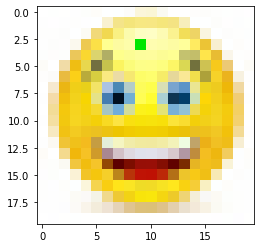

In [8]:
from PIL import Image # Nous allons nous en servir pour accéder aux pixels
import matplotlib.pyplot as plt # Utile ici pour afficher l'image
from urllib.request import urlopen  # Pour ouvrir des images sur Internet

# On récupère d'abord l'adresse d'une image sur Internet
lien_url = "https://github.com/ebuonocore/SNT_8_Photographie/blob/master/images/smiley_20_20_RVB.png?raw=true"
# Ouverture de l'image "smiley_20_20_RVB.png" pointées par le l'adresse URL
img = Image.open(urlopen(lien_url))
# Le fichier image est alors 'mémorisé' dans la variable 'img'

#Récupération et affichage des dimensions de l'image
largeur, hauteur = img.size
print("L'image totalise", largeur*hauteur, "pixels")
print("Elle fait", largeur,"*", hauteur, "px")

r,v,b = img.getpixel((4,8))
print("Canal Rouge:", r, "Canal Vert:", v, "Canal Bleu:", b)

img.putpixel((9,3),(0,230,0)) # Je modifie le point de coordonnées (9,3) vers le milieu du front
plt.imshow(img) # J'affiche l'image qui correspond à la variable 'img'

<div id="2D"></div>

## On passe à la 2D
Prochaine mission: Donner des couleurs à ce camion!
![camion_1](https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/camion_1.jpg?raw=true)

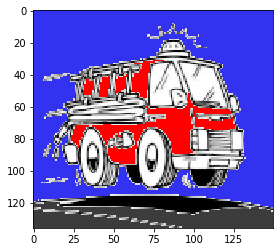

In [49]:
from PIL import Image # Nous allons nous en servir pour accéder aux pixels
import matplotlib.pyplot as plt # Utile ici pour afficher l'image
from urllib.request import urlopen  # Pour ouvrir des images sur Internet

def pixel_blanc(pos:tuple)->bool:
    """ Renvoie True si la moyenne des 3 couleurs du point dépasse 240
    """
    r,v,b = img.getpixel(pos)
    if r+v+b > 720:
        return True
    else:
        return False

def rempli(img:Image,pos:tuple, couleur:tuple):
    """ Prend une image, une position et une couleur en paramètre
        pos[0] = abscisse
        pos[1] = ordonée
        Parcours récursivement l'image depuis pos pour colorier la zone délimitée par des pixels non-blancs
    """
    largeur, hauteur = img.size
    x,y = pos # On récupère les deux données du tuple pos
    if pixel_blanc(pos):
        img.putpixel(pos,couleur) # Comme ce pixel est plutôt blanc, on le colorie en rouge
        if x > 0: # S'il reste au moins un pixel à gauche
            rempli(img,(x-1, y),couleur) # On explore le pixel à gauche
        if x < largeur-1: # S'il reste au moins un pixel à droite
            rempli(img,(x+1, y),couleur) # On explore le pixel à droite  
        if y > 0: # S'il reste au moins un pixel en haut
            rempli(img,(x, y-1),couleur) # On explore le pixel en haut
        if y < hauteur-1: # S'il reste au moins un pixel en bas
            rempli(img,(x, y+1),couleur)  # On explore le pixel en bas
        
# Corps du programme
# On récupère d'abord l'adresse d'une image sur Internet
lien_url = "https://github.com/ebuonocore/NSIT_05_Recursivite/blob/main/e05d_coloriage/camion_2.png?raw=true"
# Ouverture de l'image
img = Image.open(urlopen(lien_url)) # Le fichier image est alors 'mémorisé' dans la variable 'img'

ROUGE = (255,0,0)
BLEU = (50, 50, 240)
GRIS = (60, 60, 60)
rempli(img,(90,80), ROUGE)
rempli(img,(25,80), ROUGE)
rempli(img,(65,50), ROUGE)
rempli(img,(53,50), ROUGE)
rempli(img,(43,50), ROUGE)
rempli(img,(34,50), ROUGE)
rempli(img,(5,5), BLEU)
rempli(img,(5,125), GRIS)
rempli(img,(125,125), GRIS)
plt.imshow(img) # J'affiche l'image qui correspond à la variable 'img'

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Octobre 2020 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)